# Comparison of plotly, bokeh and matplotlib

## Installation

Installation of matplotlib and plotly are very easy with pip or conda:

```
[conda/pip] install [matplotlib/plotly]
```

Installation of bokeh is a little more involved as it needs an extension to work with jupyter lab 

```
conda install bokeh
???jupyterlabextension install jupyter_bokeh???
```

## Data creation

Make some nice sine waves

In [9]:
import numpy as np

# Linearly spaced, 0 - 2 * pi
x = np.linspace(0, np.pi*2, 1000)

# Generate offset sine waves
data = [('offset %1.2f' % i, np.sin(x+i)) for i in np.linspace(0, np.pi, 10)]
legend, ys = zip(*data)

# Line Plots

## Matplotlib

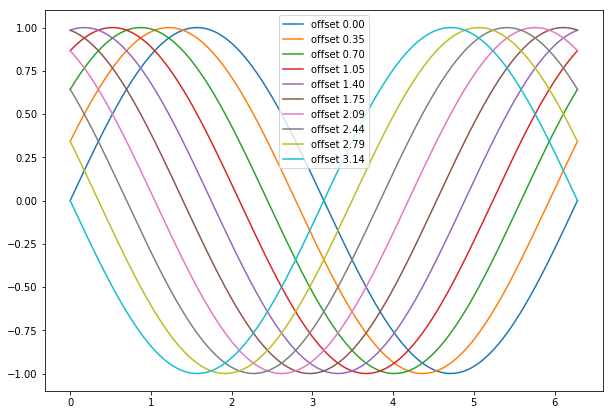

In [10]:
# Required to make it plot inline in matlab
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

for y in ys:
    plt.plot(x, y)
_ = plt.legend(legend)

## Plotly

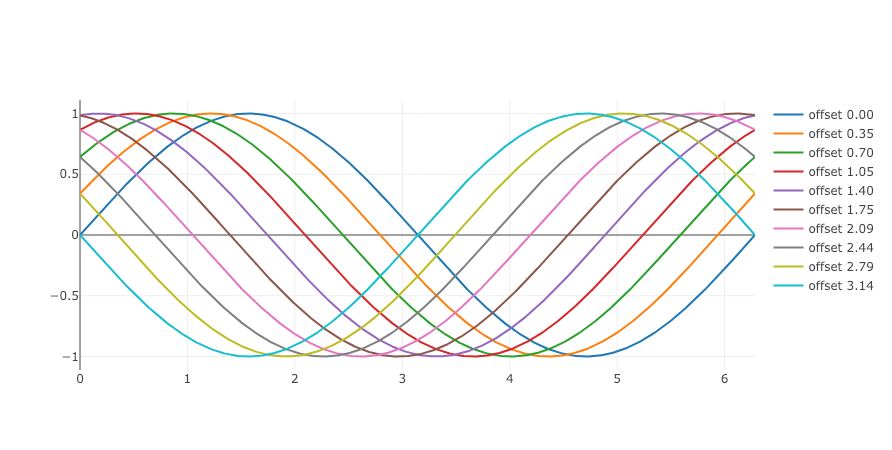

In [11]:
import plotly.graph_objs as go
import plotly.offline as py

traces = []
for leg, y in zip(legend, ys):
    traces.append(go.Scatter(x=x, y=y, name=leg))

py.iplot(traces)

## Bokeh

In [12]:
from bokeh.plotting import figure, output_notebook, show, output_file

output_notebook()

# output_file('temp.html')
p = figure()

for leg, y in zip(legend, ys):
    p.line(x, y, legend=leg)

show(p)



Loading BokehJS ...

# Scatter Plots

In [13]:
x, y = np.random.rand(2, 100)

# Matplotlib 

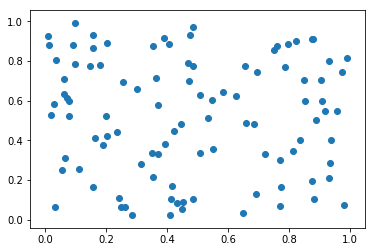

In [14]:
plt.scatter(x, y)

# Plotly

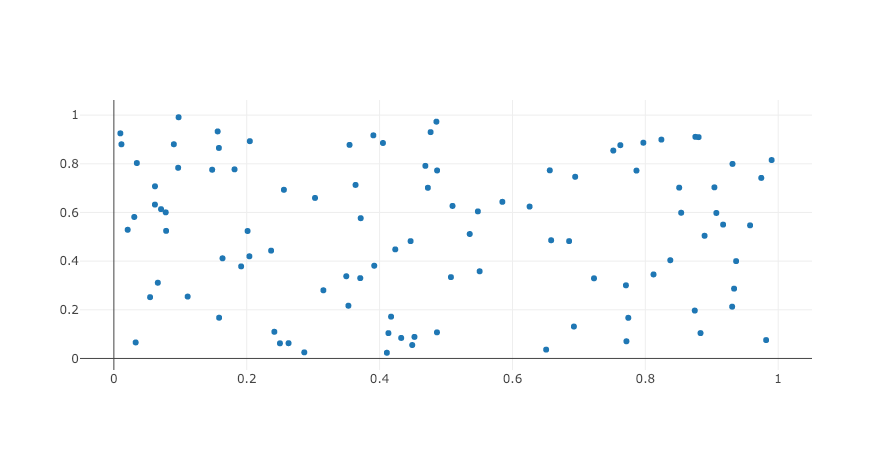

In [15]:
traces = [go.Scatter(x=x, y=y, name=leg, mode='markers')]

py.iplot(traces)

# Bokeh

In [16]:
p = figure()

p.scatter(x, y)

show(p)

# Histogram

In [17]:
x = np.random.normal(size=10000)

(array([1.000e+00, 3.900e+01, 2.240e+02, 1.141e+03, 2.577e+03, 3.182e+03,
        2.059e+03, 6.570e+02, 1.100e+02, 1.000e+01]),
 array([-4.35067893, -3.52863862, -2.7065983 , -1.88455799, -1.06251767,
        -0.24047736,  0.58156296,  1.40360327,  2.22564359,  3.0476839 ,
         3.86972422]),
 <a list of 10 Patch objects>)

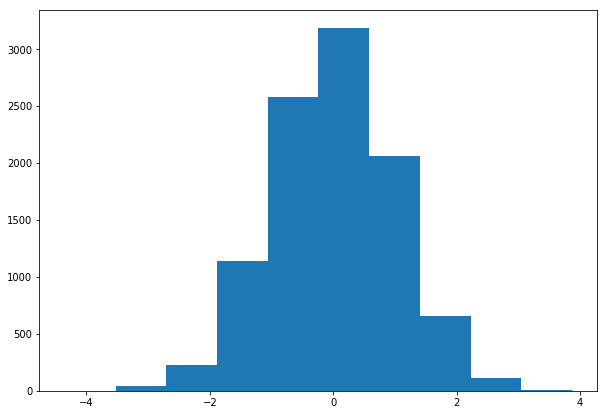

In [18]:
plt.figure(figsize=(10, 7))

plt.hist(x)

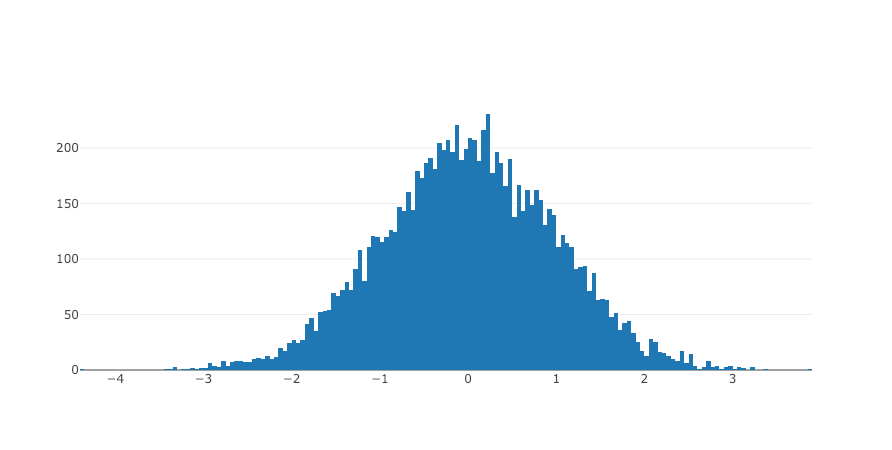

In [19]:
traces = [go.Histogram(x=x)]

py.iplot(traces)

### Bokeh

In [20]:
hist, edges = np.histogram(x, density=True, bins=100)

xx = np.linspace(-2, 2, 1000)

p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:])

show(p)